In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("D:\\Software\\Anaconda\\Sentiment-Analysis-Mahcine-Learning-NLP-Project-main\\Dataset\\train.csv")

In [5]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,2
2,my boss is bullying me...,2
3,what interview! leave me alone,2
4,"Sons of ****, why couldn`t they put them on t...",2


<Axes: xlabel='sentiment'>

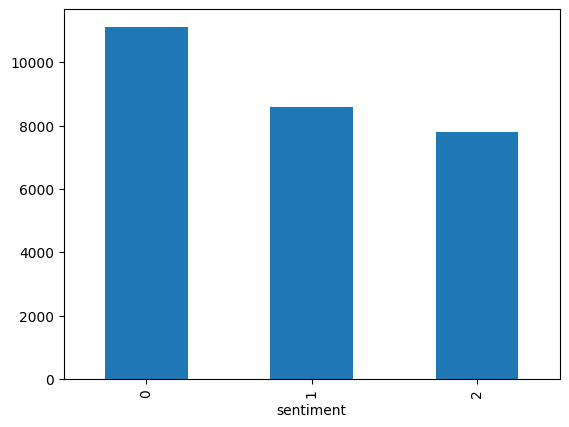

In [6]:
df['sentiment'].value_counts().plot(kind='bar')

# Data Preprocessing

In [7]:
!pip install nltk
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    # Check if text is a string or bytes-like object
    if not isinstance(text, (str, bytes)):
        return ""  # Return empty string if text is not a string or bytes-like object
    
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    
    # Find emojis
    emojis = emoji_pattern.findall(text)
    
    # Remove non-word characters, convert to lowercase, and join emojis
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    # Stemming and removing stopwords
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


In [10]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [11]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))
df['text']

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                            son put releas alreadi bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wonder rake client made clear net forc dev lea...
27478    yay good enjoy break probabl need hectic weeke...
27479                                                worth
27480                           flirt go atg smile yay hug
Name: text, Length: 27481, dtype: object

# Visualizing Neg and Pos words

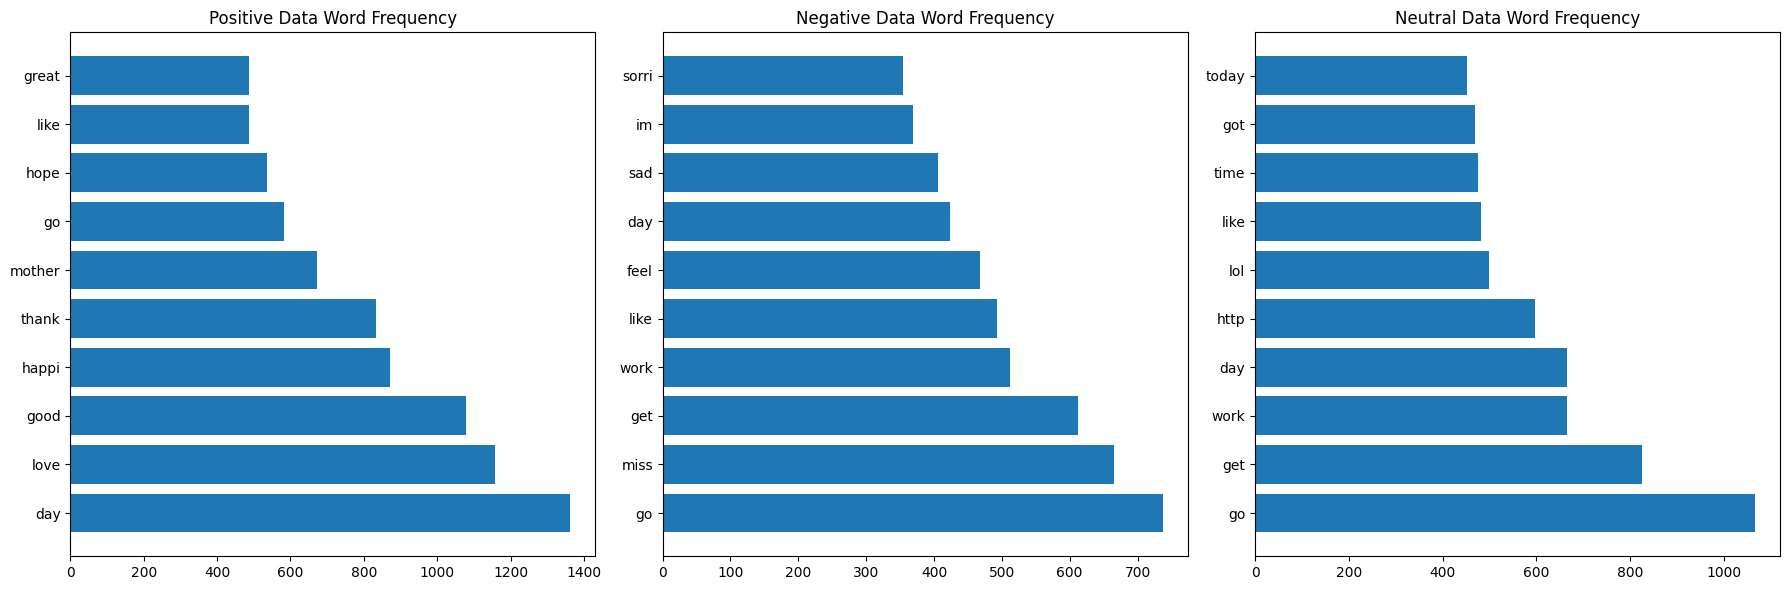

In [12]:
positivedata = df[df['sentiment'] == 1]
positivedata = positivedata['text']
negdata = df[df['sentiment'] == 2]
negdata = negdata['text']
neutraldata=df[df['sentiment'] == 0]
neutraldata=neutraldata['text']


import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Neutral data
neutral_words = ' '.join(neutraldata).split()
neutraldata_word_counts = Counter(neutral_words)
neutraldata_common_words = neutraldata_word_counts.most_common(10)  # Display top 10 common words


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Use 3 subplots instead of 2

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

# Neutral data word frequency
axes[2].barh(range(len(neutraldata_common_words)), [count for _, count in neutraldata_common_words], align='center')
axes[2].set_yticks(range(len(neutraldata_common_words)))
axes[2].set_yticklabels([word for word, _ in neutraldata_common_words])
axes[2].set_title('Neutral Data Word Frequency')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=df.sentiment.values
x=tfidf.fit_transform(df.text)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [15]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


In [16]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6778254857725057


In [17]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [ ]:
def prediction(comment):
    def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction
prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')


